(a) Distribution of ratings in the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
fig = plt.figure()

df=pd.read_csv('Amazon-Gift-Card-dataset.tsv',delimiter='\t',encoding='utf-8') #open dataset
df

marketplace  customer_id       review_id  product_id  product_parent  \
0               US     24371595  R27ZP1F1CD0C3Y  B004LLIL5A       346014806   
1               US     42489718   RJ7RSBCHUDNNE  B004LLIKVU       473048287   
2               US       861463  R1HVYBSKLQJI5S  B00IX1I3G6       926539283   
3               US     25283295  R2HAXF0IIYQBIR  B00IX1I3G6       926539283   
4               US       397970   RNYLPX611NB7Q  B005ESMGV4       379368939   
...            ...          ...             ...         ...             ...   
148305          US     40383801   R57O26VBSLMP1  B0002CZPPG       867256265   
148306          US     15124244  R375D634NGSSPI  B0002CZPPG       867256265   
148307          US     40383801  R2NCVKVC9B7I9C  B0002CZPPG       867256265   
148308          US     30603398   RC2BIM4XKDCY4  B0002CZPPG       867256265   
148309          US     16262996   RKOEI5NT6A7LL  B0002CZPPG       867256265   

                                            product_title product_category  \
0                           Amazon eGift Card - Celebrate        Gift Card   
1                                  Amazon.com eGift Cards        Gift Card   
2                     Amazon.com Gift Card Balance Reload        Gift Card   
3                     Amazon.com Gift Card Balance Reload        Gift Card   
4       Amazon.com Gift Cards, Pack of 3 (Various Desi...        Gift Card   
...                                                   ...              ...   
148305                    Apple iTunes Prepaid Card ($15)        Gift Card   
148306                    Apple iTunes Prepaid Card ($15)        Gift Card   
148307                    Apple iTunes Prepaid Card ($15)        Gift Card   
148308                    Apple iTunes Prepaid Card ($15)        Gift Card   
148309                    Apple iTunes Prepaid Card ($15)        Gift Card   

        star_rating  helpful_votes  total_votes vine verified_purchase  \
0                 5              0            0    N                 Y   
1                 5              0            0    N                 Y   
2                 5              0            0    N                 Y   
3                 1              0            0    N                 Y   
4                 5              0            0    N                 Y   
...             ...            ...          ...  ...               ...   
148305            5             10           10    N                 N   
148306            4              8           44    N                 N   
148307            5             20           30    N                 N   
148308            4             63           72    N                 N   
148309            5             26           29    N                 N   

                                          review_headline  \
0                                              Five Stars   
1       Gift card for the greatest selection of items ...   
2                                              Five Stars   
3                                                One Star   
4                                              Five Stars   
...                                                   ...   
148305  Way easier than explaining your musical taste ...   
148306                                    itunes paid for   
148307  Way easier than explaining your musical taste ...   
148308                A great way to turn cash into songs   
148309                                   iTunes Gift Card   

                                              review_body review_date  
0                  Great birthday gift for a young adult.  2015-08-31  
1       It's an Amazon gift card and with over 9823983...  2015-08-31  
2                                                    Good  2015-08-31  
3                                                    Fair  2015-08-31  
4       I can't believe how quickly Amazon can get the...  2015-08-31  
...                                                   ...         .

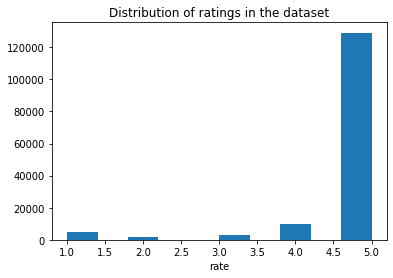

In [2]:
plt.hist(df.star_rating)#histogram of star_rating
plt.xlabel('rate')
plt.title('Distribution of ratings in the dataset')
plt.savefig('Distribution of ratings.jpg')

(b) Linear Regression

In [3]:
char=",;."

def count_words(text): # count words in the review (excluding ’,’ and ’.’ and ';')
    text=str(text) 
    n=1
    text=text.replace(char,"") #replace every element of char by void
    for element in text:
        if element==" ":
            n+=1
    return n

In [6]:
df['length_review'] = df.review_body.apply(count_words)    #identify length of review
df['length_review']

0           7
1          19
2           1
3           1
4          15
         ... 
148305     48
148306     16
148307     51
148308     49
148309    113
Name: length_review, Length: 148310, dtype: int64

In [7]:
#Here are two methods to replace Y by 1 and N by 0

#df['verified_purchase'] = np.where(df['verified_purchase'] =='Y', 1, 0)
df['verified_purchase'] = (df['verified_purchase']=='Y')*1
df['verified_purchase']

0         1
1         1
2         1
3         1
4         1
         ..
148305    0
148306    0
148307    0
148308    0
148309    0
Name: verified_purchase, Length: 148310, dtype: int32

In [8]:
#Linear regression

lr.fit(df[['verified_purchase','length_review']],df['star_rating'])

theta_0 = lr.intercept_
theta_1=lr.coef_[0]
theta_2=lr.coef_[1]

print(theta_0,theta_1,theta_2)

4.854646850633222 0.044232123093298235 -0.006620067190878825


(c) RMSE error

In [9]:
m=148310

df_train=df[0:int(0.9*m)] #90 first percents of the pendas dataframe
df_test=df[int(0.9*m):] #10 last percents of the dataframe

In [10]:
#linear regression
lr.fit(df_train[['verified_purchase','length_review']],df_train['star_rating'])

theta_0_train = lr.intercept_
theta_1_train=lr.coef_[0]
theta_2_train=lr.coef_[1]

print(theta_0_train,theta_1_train,theta_2_train)

4.678458192429161 0.23214004347870412 -0.007231061341726445


In [11]:
train_prediction = lr.predict(df_train[['verified_purchase','length_review']])  #prediction on same dataset
train_MSE = mean_squared_error(train_prediction,df_train['star_rating'])
train_RMSE = np.sqrt(train_MSE)
print(train_MSE,train_RMSE)

0.6199948426089144 0.7873975124477561


In [12]:
test_prediction = lr.predict(df_test[['verified_purchase','length_review']])  #prediction on a new one
test_MSE = mean_squared_error(test_prediction,df_test['star_rating'])
test_RMSE = np.sqrt(test_MSE)
print(test_MSE,test_RMSE)

0.9582310805671829 0.9788927829783928


(d) Polynomial Regression

In [13]:
def create_poly_reg(degree): #polynomial regression for one specific degree

    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(df_test[['verified_purchase','length_review']])  
    lr.fit(X_train_poly, df_test['star_rating'])  # fit the transformed features to Linear Regression
    y_train_predict= lr.predict(X_train_poly)  # predicting on training data-set
    return y_train_predict

In [14]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(df_test[['verified_purchase','length_review']])  
X_train_poly

array([[1.0000e+00, 1.0000e+00, 2.8000e+01, 1.0000e+00, 2.8000e+01,
        7.8400e+02],
       [1.0000e+00, 0.0000e+00, 3.1000e+01, 0.0000e+00, 0.0000e+00,
        9.6100e+02],
       [1.0000e+00, 0.0000e+00, 3.1000e+01, 0.0000e+00, 0.0000e+00,
        9.6100e+02],
       ...,
       [1.0000e+00, 0.0000e+00, 5.1000e+01, 0.0000e+00, 0.0000e+00,
        2.6010e+03],
       [1.0000e+00, 0.0000e+00, 4.9000e+01, 0.0000e+00, 0.0000e+00,
        2.4010e+03],
       [1.0000e+00, 0.0000e+00, 1.1300e+02, 0.0000e+00, 0.0000e+00,
        1.2769e+04]])

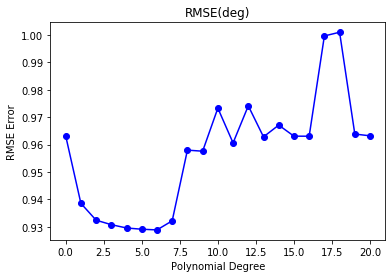

In [16]:
def create_poly_reg(degree): #polynomial regression for one specific degree

    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(df_test[['verified_purchase','length_review']])  
    lr.fit(X_train_poly, df_test['star_rating'])  # fit the transformed features to Linear Regression
    y_train_predict= lr.predict(X_train_poly)  # predicting on training data-set
    return y_train_predict

L1=[]
n=21

for k in range(0,n):
    test_MSE = mean_squared_error(create_poly_reg(k),df_test['star_rating'])
    test_RMSE = np.sqrt(test_MSE)
    L1.append(test_RMSE)

#plot RMSE error on 21 first degrees

Y1=np.array(L1)
X1=np.arange(0, n)

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE Error')
plt.title('RMSE(deg)')
plt.plot(X1,Y1,'-bo')

plt.savefig('exo10_question_d_deg_20.jpg')

In [18]:
#Compute accuracy score

from sklearn.metrics import accuracy_score

poly = PolynomialFeatures(6)
X_train_poly = poly.fit_transform(df_test[['verified_purchase','length_review']])  
lr.fit(X_train_poly, df_test['star_rating'])
y_train_predict= lr.predict(X_train_poly)

accuracy_score(df_test['star_rating'],y_train_predict) #raise a valuerror

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [19]:
#accuracy of int(y_predict)

for k in range(len(y_train_predict)):
    y_train_predict[k]=int(y_train_predict[k])  #taking entire part of each data
    
accuracy_score(df_test['star_rating'],y_train_predict)

0.06472928325804059